## Exploratory data analysis

This notebook provides infos about the distribution of the data collected as well as how it has been gathered.

### Raw data collection

The task to be performed requires a big corpus of Java source code and the choice made is to clone and compile a number 
of popular open source projects to perform static analysis and label source files as vulnerable or not.

The projects that have been analyzed are mostly from the Apache Software Foundation:

* [Atlas (1.2.0-rc3)](https://github.com/apache/atlas/releases/tag/release-1.2.0-rc3)
* [Calcite (1.18.0)](https://github.com/apache/calcite/releases/tag/calcite-1.18.0)
* [Camel (2.20.4)](https://github.com/apache/camel/tree/220d36e64b669bc1464a41a613f512e6bae23edb)
* [Dubbo (2.7.3)](https://github.com/apache/dubbo/releases/tag/dubbo-2.7.3)
* [Flink (1.9.0)](https://github.com/apache/flink/releases/tag/release-1.9.0)
* [Hadoop (3.1.1)](https://github.com/apache/hadoop/tree/2b9a8c1d3a2caf1e733d57f346af3ff0d5ba529c)
* [Hbase (2.1.6)](https://github.com/apache/hbase/releases/tag/rel%2F2.1.6)
* [Ignite (2.07.05)](https://github.com/apache/ignite/releases/tag/2.7.5)
* [Knox (0.3.0)](https://github.com/apache/knox/releases/tag/v0.3.0-final)
* [Maven (3.5.0)](https://github.com/apache/maven/tree/ff8f5e7444045639af65f6095c62210b5713f426)
* [Nifi (0.4.0)](https://github.com/apache/nifi/releases/tag/nifi-0.4.0)
* [Pulsar (2.4.1)](https://github.com/apache/pulsar/releases/tag/v2.4.1)
* [Ranger (2.0.0)](https://github.com/apache/ranger/releases/tag/release-ranger-2.0.0)
* [Rocketmq (4.3.0)](https://github.com/apache/rocketmq/releases/tag/rocketmq-all-4.3.0)
* [Storm (0.9.3)](https://github.com/apache/storm/releases/tag/v0.9.3)
* [Syncope (1.2.8)](https://github.com/apache/syncope/releases/tag/syncope-1.2.8)
* [Tika (1.0)](https://github.com/apache/tika/releases/tag/1.0)
* [Tomcat (8.05.01)](https://github.com/apache/tomcat/releases/tag/8.5.1)

Also intentionally vulnerable projects were taken into account:

* [bodgeit (1.4.0)](https://github.com/psiinon/bodgeit)
* [Webbank](https://github.com/pentestingforfunandprofit/webbank)
* [Webgoat](https://github.com/WebGoat/WebGoat)

### Source files labeling

Artifacts of all the projects were used to perform static analysis with SpotBugs and its plugin Find-Sec-Bugs. As the
task is to work at file-level granularity, we marked files vulnerable if they presented at least a bug belonging to
correctness, multi-threaded correctness, malicious code, bad practice and security categories.

The choice of having the output of a static analyzer as ground truth (and so to avoid using public databases like the
NVD) derives from the results shown in previous works that highlight how model trained on synthetic source code perform
worse than those trained on SASTs output.

Although SpotBugs has been reported to output a relevant amount of false-positives (this behavior has been improved with
the latest releases), the results of this study are to be considered as a lower bound of the performance that a similar
model would achieve if trained on a hand-crafted dataset made by security experts.

### Dataset distribution

The data collected turned out to be split between safe and vulnerable files as follows.


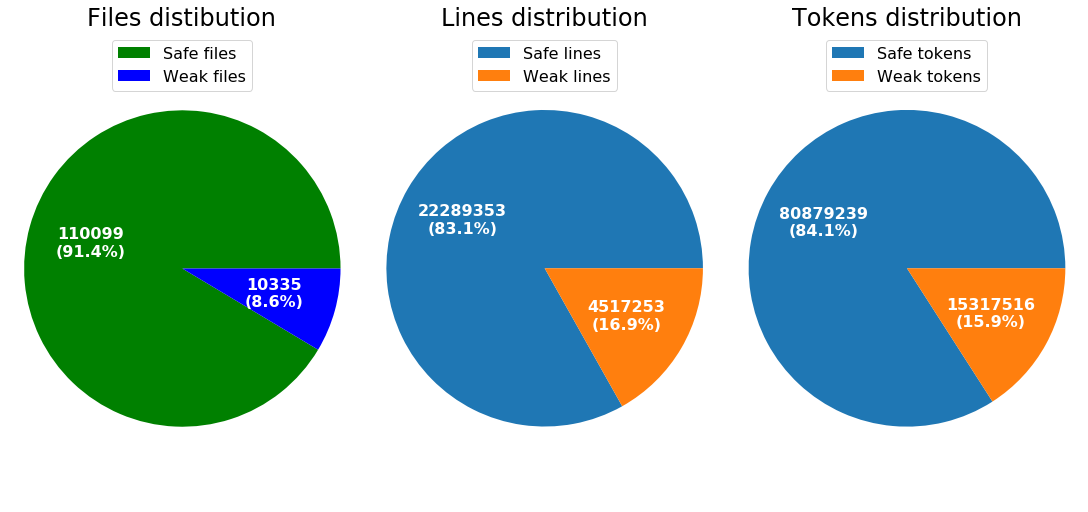

In [4]:
import matplotlib.pyplot as plt
import numpy as np

import src.preparation.stats_extractor as stats_extractor

%matplotlib inline

stats_extractor.__extract_stats()

files_count = stats_extractor.count_files()
lines_count = stats_extractor.count_lines()
tokens_count = stats_extractor.count_tokens()

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:d}\n({:.1f}%)".format(absolute, pct)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,7), constrained_layout=True)

wedges, texts, autotexts = ax[0].pie([files_count["safe"], files_count["weak"]], 
        autopct=lambda pct: func(pct, [files_count["safe"], files_count["weak"]]), textprops=dict(color="w"))
ax[0].axis("equal")
ax[0].legend(["Safe files", "Weak files"], loc="upper center", fontsize=16)
plt.setp(autotexts, size=16, weight="bold")
ax[0].set_title("Files distibution", fontsize=24)

wedges, texts, autotexts = ax[1].pie([lines_count["safe"], lines_count["weak"]],
        autopct=lambda pct: func(pct, [lines_count["safe"], lines_count["weak"]]), textprops=dict(color="w"))
ax[1].axis("equal")
ax[1].legend(["Safe lines", "Weak lines"], loc="upper center", fontsize=16)
plt.setp(autotexts, size=16, weight="bold")
ax[1].set_title("Lines distribution", fontsize=24)

wedges, texts, autotexts = ax[2].pie([tokens_count["safe"], tokens_count["weak"]],
        autopct=lambda pct: func(pct, [tokens_count["safe"], tokens_count["weak"]]), textprops=dict(color="w"))
ax[2].axis("equal")
ax[2].legend(["Safe tokens", "Weak tokens"], loc="upper center", fontsize=16)
plt.setp(autotexts, size=16, weight="bold")
ax[2].set_title("Tokens distribution", fontsize=24)

plt.show()